# 本週任務 ：
使用任意畫圖包畫出 星期幾 v.s 銷售量 的 bar chart。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
Orders = pd.read_csv('datasets/Orders.csv', low_memory=False)

In [3]:
Orders['new_DateId'] = pd.to_datetime(Orders['DateId'].astype(str), format='%Y%m%d')
data = Orders.groupby(by='new_DateId')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True)
data.head(5)

,new_DateId,Quantity
0,2015-05-06,26
1,2015-05-07,38
2,2015-05-08,61
3,2015-05-09,87
4,2015-05-10,103


In [44]:
import datetime
data['weekday'] = data['new_DateId'].apply(lambda x: x.weekday())
data.head()

,new_DateId,Quantity,weekday
0,2015-05-06,26,2
1,2015-05-07,38,3
2,2015-05-08,61,4
3,2015-05-09,87,5
4,2015-05-10,103,6


In [39]:
weekday_data = data.groupby(by='weekday')['Quantity'].sum().to_frame()
weekday_data.reset_index(level=0, inplace=True)
weekday_data.head()

,weekday,Quantity
0,0,750079
1,1,827454
2,2,836489
3,3,773765
4,4,743191


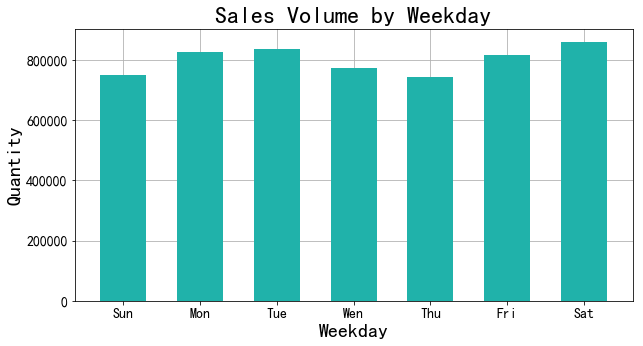

In [42]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(weekday_data.weekday,weekday_data.Quantity, width=0.6, color="lightseagreen", zorder=2) 
plt.xlabel("Weekday", fontsize=20) 
plt.ylabel("Quantity", fontsize=20) 
plt.title("Sales Volume by Weekday", fontsize=24)
labels = ["Sun","Mon","Tue","Wen","Thu","Fri","Sat"]
plt.xticks(weekday_data.weekday,labels, size=14)
plt.yticks(size=14)
plt.grid(True, zorder=1)
plt.show()